('kd', 0.25132741228718347, 'ka', 2.5132741228718345, 'kon', 0.22847946571562133)
5e-05
L 1.0
rv 0.005
Ls 1.01232885531
no of a 103
no of b 103
vol fract % 0.0103968312338


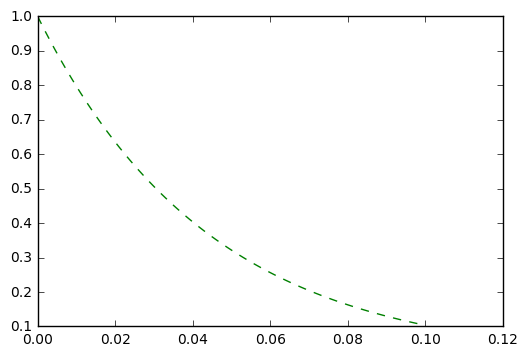

In [1]:
%matplotlib inline
from ecell4 import *
import numpy as np
import math
import matplotlib.pyplot as plt

factor = 100
run = 1

voxelr = 0.005  
D = 1
kd= 4.0*math.pi*D*4*voxelr
ka = 10*kd
kon = (ka*kd)/(ka+kd)
print('kd',kd,'ka', ka,'kon', kon)
tau =(2*voxelr)**2/(2*D)
print tau
T = 0.1
conc = 100

L = voxelr*factor*2
print 'L',L
print 'rv',voxelr
V1 = L**3
V2 =  spatiocyte.SpatiocyteWorld(ones()*L,voxelr).get_volume()
Ls = (V2)**(1./3)
print 'Ls',Ls
N = int(conc*V2)

phi = (100*2*N*4.*math.pi*(voxelr**3)/(3*V2)) 
print 'no of a',N
print 'no of b',N
print 'vol fract %',phi

with reaction_rules():#for ODE
    A + B > B | kon

m1 = get_model()

with species_attributes():
    A |B |C| {'D': str(D), 'radius':str(voxelr)}

with reaction_rules():#for spa and egfrd
    A + B > B | ka

m2 = get_model()

ode = np.array(run_simulation(T, model=m1, y0={'A': N,'B': N}, solver='ode', volume=V2, return_type='array'))
to = ode[:,0]
nao = ode[:,1]

plt.plot(to,nao/N,'g--')

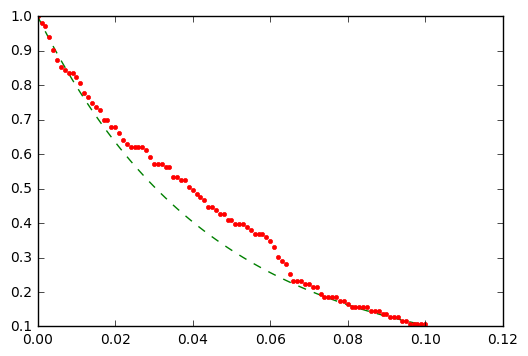

In [2]:
spa = np.array(ensemble_simulations(run, T, y0={"A": N,'B': N}, model=m2, solver=("spatiocyte", voxelr), volume=V1,return_type='array'))
ts = spa[0][0][:,0]
nas = np.mean(spa[0][:,:,1],axis=0)

plt.plot(to,nao/N,'g--')
plt.plot(ts,nas/N,'r.')

x [ 0.          4.91934955  6.95701085]
tau 4.13223140496e-05
phis [1.0, 0.11258960206392235, 0.080338193730666627]
dx 1e-05
kt [2.5132741228718345, 0.48572358696261525, 0.41203574151702921]
st [1.0, 0.9985123687958949, 0.998067472298905]


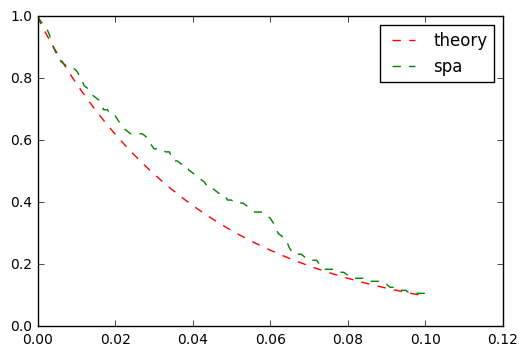

In [11]:
def phi(x):
    return [1./( (377.*xx/324)+(1+ (314.*(xx**2)/847) )**0.5) for xx in x]

def phi3(x):
    p = []
    l=len(x)
    for i in range(l):
        if (i==0):
            p.append(math.exp(x[i]**2)*math.erfc(x[i]))
        else:
            xi = 1./x[i]
            p.append((1./math.sqrt(math.pi))*xi*(1- 0.5*xi+0.75*xi**2-1.875*xi**3+6.5625*xi**4 -29.53125*xi**5))
    return p

def phi2(x):
    tt =1.0/(1.0+0.5*x) 
    phi = [t*math.exp(-1.26551223+t*(1.00002368+t*(0.37409196+t*(0.09678418+t*(-0.18628806+t*(0.27886807+t*(-1.13520398+t*(1.48851587+ t*(-0.82215223+t*0.17087277))))))))) for t in tt] 
    return phi

tau = ((ka*2*voxelr/(ka+kd))**2)/(2*D)
tt= np.arange(0,ts[-1],1e-5)
x = ka*((tt/tau)**(0.5))/kd
print 'x',x[:3]
print 'tau',tau
phis = phi(x)
print 'phis',phis[:3]
#kt = [kon for phi in phis]
kt = [kon*(1+(ka*p/kd)) for p in phis]
st = []
dx = tt[2]-tt[1]
for i in range(len(tt)):
    st.append(math.exp(-(N/V2)*np.trapz(kt[0:i+1],dx=dx)))
print 'dx',dx
print 'kt',kt[:3]
print 'st',st[:3]
#plt.plot(tt,kt,'.')
#plt.xlim()
plt.plot(tt,st,'r--',label='theory')
plt.plot(ts,nas/N,'g--',label='spa')
ax= plt.gca()
#ax.set_yscale("log")
plt.legend()


In [4]:
z=np.polyfit(ts,n,1)
slope = z[0]
print slope,slope/(-N/V2)
plt.plot(ts,n,'--')
plt.plot(ts,np.poly1d(z)(ts),'-')

NameError: name 'n' is not defined